<a href="https://colab.research.google.com/github/neuroqudit/pykoppu/blob/main/notebooks/04_solving_maxcut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving MaxCut with KOPPU

This notebook demonstrates how to solve the Maximum Cut (MaxCut) problem using the KOPPU OPU. We will generate a random graph, map it to the OPU, and visualize the solution.

## 1. Problem Formulation

The MaxCut problem involves partitioning the vertices of a graph into two disjoint sets such that the number (or total weight) of edges between the two sets is maximized.

Mathematically, for a graph $G=(V, E)$ with edge weights $w_{ij}$, we want to maximize the cut size $S$:

$$ S = \sum_{(i,j) \in E} w_{ij} \frac{1 - s_i s_j}{2} $$

Where:
- $s_i \in \{-1, 1\}$ represents the partition assignment of vertex $i$ (spin variable).
- If $s_i \neq s_j$, then $\frac{1 - s_i s_j}{2} = 1$ (edge is cut).
- If $s_i = s_j$, then $\frac{1 - s_i s_j}{2} = 0$ (edge is not cut).

In [1]:
!pip install pykoppu==0.2.34a0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 32.6 MB/s eta 0:00:00


In [2]:
import pykoppu as pk
import networkx as nx
import matplotlib.pyplot as plt

# 1. Generate a Random Graph
print("Generating Graph...")
G = nx.erdos_renyi_graph(n=20, p=0.3, seed=42)
pos = nx.spring_layout(G)

Generating Graph...


## 2. PUBO Mapping

The MaxCut problem maps naturally to the Ising model (and thus PUBO). Maximizing the cut size $S$ is equivalent to minimizing the energy of an antiferromagnetic Ising model.

The Hamiltonian $H$ is:

$$ H = \sum_{(i,j) \in E} J_{ij} s_i s_j $$

Where we set $J_{ij} = w_{ij} > 0$. Since the system tries to minimize energy, it will favor configurations where $s_i$ and $s_j$ have opposite signs (anti-aligned spins), which corresponds to the edge being cut.

### Tensors and Solver Process

1.  **Tensors**: The adjacency matrix of the graph (weighted by $w_{ij}$) is directly used to construct the coupling tensor $J$. There are no local fields ($h=0$) in the standard MaxCut formulation.
2.  **Solver Process**: The OPU relaxes the system. The antiferromagnetic couplings induce frustration, and the system settles into a state that minimizes the number of "unsatisfied" edges (edges connecting nodes of the same spin), effectively maximizing the cut.

Mapping to OPU...
Solving...
Visualizing OPU Dynamics...


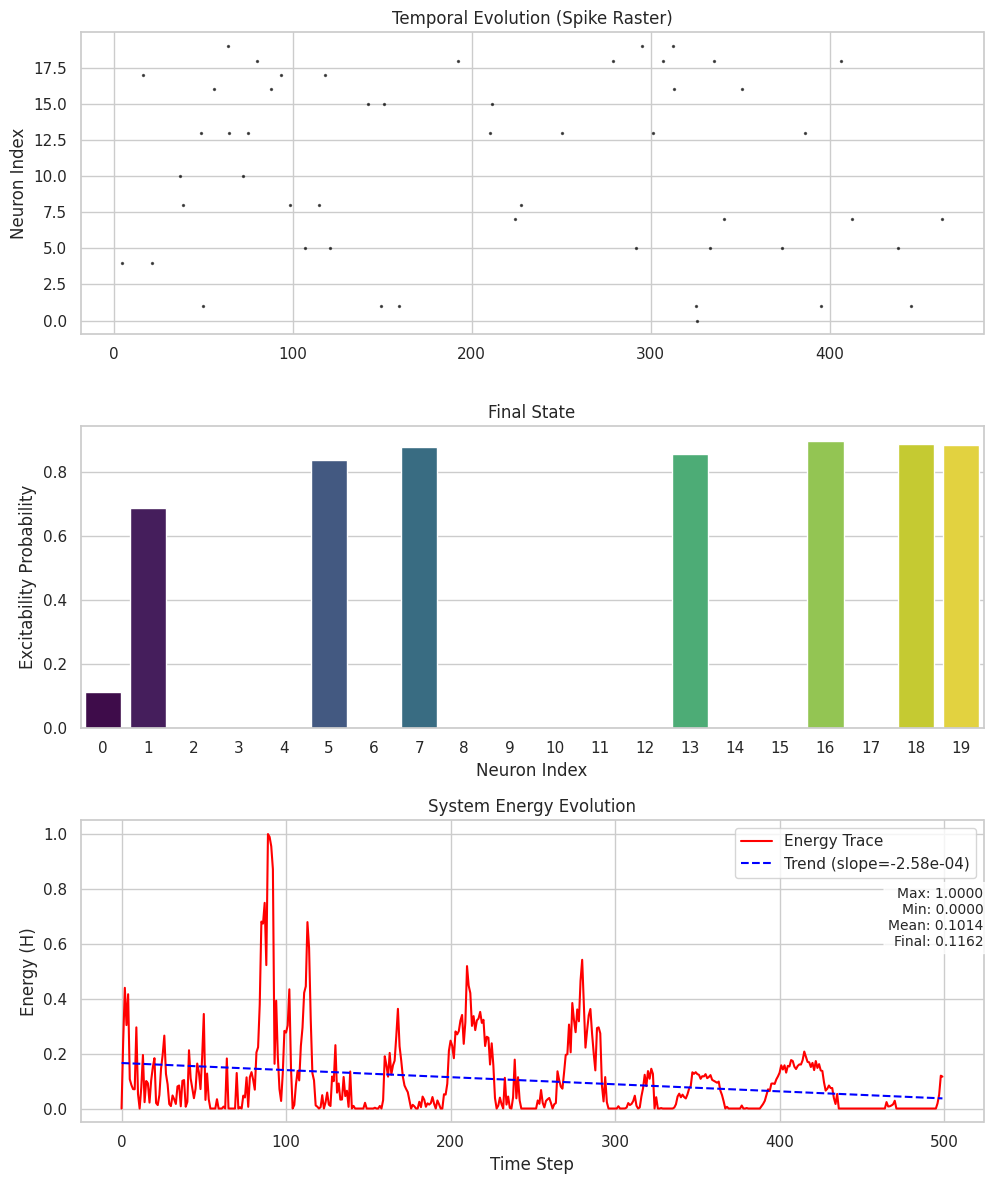

In [3]:
# 2. Create MaxCut Problem
print("Mapping to OPU...")
problem = pk.problems.graph.MaxCut(G)

# 3. Solve
print("Solving...")
# We set the simulation duration to 500ms using the 't' parameter
process = pk.oos.Process(problem, backend='cpu', t=500)
result = process.run()

# 4. Display OPU Dynamics
print("Visualizing OPU Dynamics...")
result.plot()

## 3. Solution Analysis

We visualize the graph with nodes colored according to their final partition assignment. The edges crossing the partition (the cut) can be highlighted.

Visualizing Graph Solution...


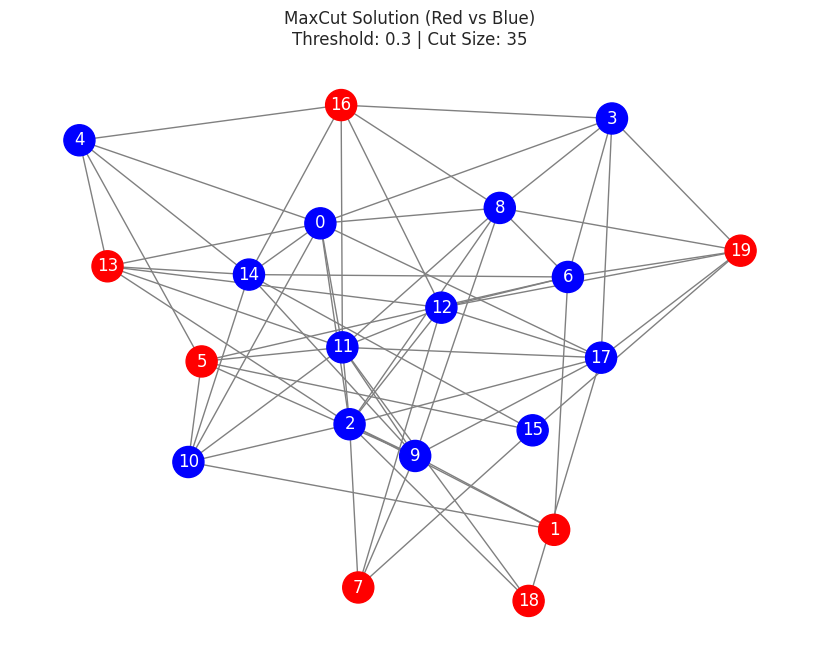

In [4]:
# 5. Analyse and Display Solution
print("Visualizing Graph Solution...")
# We use a threshold of 0.3 to determine if a neuron has 'fired' (state=1)
# You can run this cell multiple times with different thresholds to explore the solution space
problem.plot(result, threshold=0.3)